In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from random import randint
import seaborn as sns
import sys
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import src.false_labels_effect.util as util
import src.false_labels_effect.models as models

In [3]:
# set training and test img path

train_img_path = Path("../data/Images_4c_Poly/Train")
test_img_path = Path("../data/Images_4c_Poly/Test")

# set label path

train_label_path = Path("../data/Labels_4c_Poly/Train.npy")
test_label_path = Path("../data/Labels_4c_Poly/Test.npy")

# load labels dict
train_labels_dict = util.load_labels(train_label_path)
test_labels_dict = util.load_labels(test_label_path)

In [4]:
# show random example train label
train_exm = "Train_" + str(randint(1, len(train_labels_dict.keys()))).zfill(5)
print(f"Example labels_dict['{train_exm}'] = {train_labels_dict[train_exm]}")

# show random example test label
test_exm = "Test_" + str(randint(1, len(test_labels_dict.keys()))).zfill(5)
print(f"Example labels_dict['{test_exm}'] = {test_labels_dict[test_exm]}")

Example labels_dict['Train_04589'] = {'Img_id': 'Train_04589', 'Class': 'Blob', 'Subclass': 'Red', 'Annotations': [[85, 103], [167, 85], [392, 229], [168, 284], [85, 103]]}
Example labels_dict['Test_03836'] = {'Img_id': 'Test_03836', 'Class': 'Channel_Change', 'Subclass': "['Green', 'Blue', 'Red']", 'Annotations': [[41, 286], [87, 74], [255, 1], [338, 181], [41, 286]]}


In [5]:
# get all main classes
main_classes_list = []
for label_set in [train_labels_dict.values(), test_labels_dict.values()]:
    for label in label_set:
        main_classes_list.append(label['Class'])

main_classes_set = sorted(set(main_classes_list))
main_classes_set

['Blob', 'Blur', 'Channel_Change', 'Distortion']

In [6]:
# get all sub classes
sub_classes_list = []
for label_set in [train_labels_dict.values(), test_labels_dict.values()]:
    for label in label_set:
        sub_classes_list.append(label['Class'] + ' - ' + str(label['Subclass']))
        
sub_classes_set = sorted(set(sub_classes_list))
sub_classes_set

['Blob - All',
 'Blob - Blue',
 'Blob - Green',
 'Blob - Red',
 'Blur - None',
 "Channel_Change - ['Blue', 'Green', 'Red']",
 "Channel_Change - ['Blue', 'Red', 'Green']",
 "Channel_Change - ['Green', 'Blue', 'Red']",
 "Channel_Change - ['Green', 'Red', 'Blue']",
 "Channel_Change - ['Red', 'Blue', 'Green']",
 'Distortion - All',
 'Distortion - Blue',
 'Distortion - Green',
 'Distortion - Red']

In [7]:
for label in sub_classes_set:
    print(f'{sub_classes_list.count(label)} - {label}')
    
print('\n---\n')

for label in main_classes_set:
    print(f'{main_classes_list.count(label)} - {label}')

1310 - Blob - All
1384 - Blob - Blue
1400 - Blob - Green
1359 - Blob - Red
5538 - Blur - None
1090 - Channel_Change - ['Blue', 'Green', 'Red']
1111 - Channel_Change - ['Blue', 'Red', 'Green']
1108 - Channel_Change - ['Green', 'Blue', 'Red']
1096 - Channel_Change - ['Green', 'Red', 'Blue']
1151 - Channel_Change - ['Red', 'Blue', 'Green']
1413 - Distortion - All
1389 - Distortion - Blue
1375 - Distortion - Green
1353 - Distortion - Red

---

5453 - Blob
5538 - Blur
5556 - Channel_Change
5530 - Distortion


In [8]:
colorblind_palette = sns.color_palette('colorblind', 10)
colorblind_palette

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

/tmp/ipykernel_25721/521603893.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(texts, rotation = 40, ha = 'right')


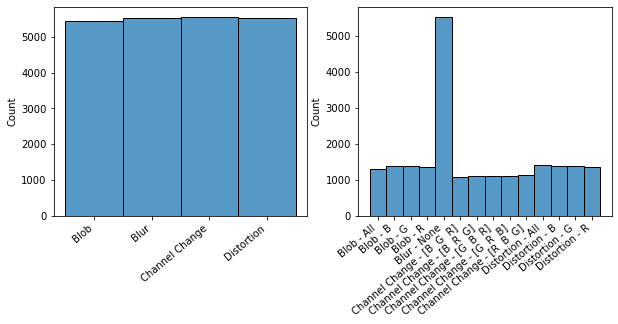

In [9]:
def update_label(label: str) -> str:
    label = label.replace('_', ' ').replace(',', ' ').replace("'", '')
    label = label.replace('Green', 'G')
    label = label.replace('Blue', 'B')
    label = label.replace('Red', 'R')
    
    return label

f, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))
plt.subplots_adjust(bottom=0.3)

sns.histplot(sorted(main_classes_list), ax = axes[0])
sns.histplot(sorted(sub_classes_list), ax = axes[1])

plt.draw()

for ax in axes:
    
    texts = [update_label(t.get_text())  for t in ax.get_xticklabels()]
    ax.set_xticklabels(texts, rotation = 40, ha = 'right')
    
f.savefig('../assets/class_hist.png', dpi=300, facecolor='white')

In [17]:
bCNN_4cl = models.create_cnn_model(img_shape=(244, 244), n_classes=4, false_labels_ratio=0)
plot_model(bCNN_4cl, to_file=f'../assets/basic_CNN_4classes.png', show_shapes=True, show_layer_names=True)

bCNN_14cl = models.create_cnn_model(img_shape=(244, 244), n_classes=14, false_labels_ratio=0)
plot_model(bCNN_14cl, to_file=f'../assets/basic_CNN_14classes.png', show_shapes=True, show_layer_names=True)

resnet_4cl = models.create_resnet_model(img_shape=(244, 244), n_classes=4, false_labels_ratio=0)
plot_model(resnet_4cl, to_file=f'../assets/resnet_CNN_4classes.png', show_shapes=True, show_layer_names=True)

resnet_14cl = models.create_resnet_model(img_shape=(244, 244), n_classes=14, false_labels_ratio=0)
plot_model(resnet_14cl, to_file=f'../assets/resnet_CNN_4classes.png', show_shapes=True, show_layer_names=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')
('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')
('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')
('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')
